In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{\mathbb{E}}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Bayesian Statistics and Information Theory
==========================================

Probability theory can be seen either with the frequentist point of view
or with the Bayesian point of view. The frequentist point of view
assumes that the experiment is repeated a large number of times. From
the Bayesian point of view, probability is the belief that an event will
occur. It expresses a degree of confidence.

This chapter will discuss how, in the context of machine learning, the
Bayesian perspective is useful for quantifying the uncertainty
associated with the parameters of a given model.

4.1 Bayes’ Theorem
------------------

There are situations where your beliefs about the probability of an
event can be influenced by new knowledge. This idea of incorporating
evidence to update the probability of an event is developed in the
*Bayes’ Theorem*.

### 4.1.1 Mathematical Formulation

As a first step, let’s see how the Bayes’ theorem can be used to reverse
conditional probability. Let’s have two random variables, $\rx$ and
$\ry$. You’ll see that you can use the Bayes’ theorem to go from
$P(\ry=y | \rx=x)$ to the reverse probability $P(\rx=x | \ry=y)$.

To do that, the Bayes’ Theorem uses the sum rule and the product rule
(as you learned respectively in
Section 2.4.2.1 and
Section 2.4.3.3). Let’s see the
derivation:

The product rule tells you that:

$$
P(\ry=y | \rx=x) = \frac{P(\rx=x ,\ry=y)}{P(\rx=x)}
\qquad (2)$$

Similarly, the product rule tells you that the reverse probability of
$\rx=x$, given that $\ry=y$ is expressed as:

$$
P(\rx=x | \ry=y) = \frac{P(\ry=y ,\rx=x)}{P(\ry=y)}
$$

which can also be written as follows:

$$
P(\ry=y ,\rx=x) = P(\rx=x | \ry=y)P(\ry=y)
\qquad (3)$$

In addition, note that the probability of getting $\rx=x$ and $\ry=y$
($P(\rx=x ,\ry=y)$) is equivalent to the probability of getting $\ry=y$
and $\rx=x$ ($P(\ry=y ,\rx=x)$):

$$
P(\ry=y ,\rx=x) = P(\rx=x ,\ry=y)
$$

So, replacing the equation [3](#eq:joint_y_x) in the equation
[2](#eq:prod_y_given_x), you get the Bayes’ Theorem:

$$
P(\ry=y | \rx=x) = \frac{P(\rx=x | \ry=y) P(\ry=y)}{P(\rx=x)}
\qquad (4)$$

The Bayes’ theorem can be used to go from $P(\ry=y | \rx=x)$ to the
reverse probability $P(\rx=x | \ry=y)$.

### 4.1.2 Example

Let’s return to the example from
Section 2.4.3.2 (you can refer to it
for the details), illustrated in Figure
[41](#fig:ch03_conditional_proba).

You’ll use Bayes’ Theorem to calculate
$P(\text{needs repair} | \text{warning light})$, which is the
probability that the car needs repair given that the warning light is
on. To do that, you need the marginal probability that the warning light
is on ($P(\text{warning light})$) and the reverse conditional
probability, that the warning light is on given that the car needs
repair ($P(\text{warning light} | \text{needs repair})$).

$$
\begin{aligned}
P(\text{needs repair} | \text{warning light}) &= \frac{P(\text{warning light} | \text{needs repair}) P(\text{needs repair})}{P(\text{warning light})} \\\\
&= \frac{\frac{1}{4} \cdot \frac{4}{5}}{\frac{2}{5}} = \frac{\frac{4}{20}}{\frac{2}{5}}
= \frac{4}{20} \cdot \frac{5}{2}
= \frac{20}{40} = \frac{1}{2}
\end{aligned}
$$

You can check in Figure [41](#fig:ch03_conditional_proba) that the
probability of the event “the car needs repair” given that “the warning
light is on” is indeed $\frac{1}{2}$.

### 4.1.3 Bayesian Interpretation

You can think of the Bayes’ Theorem as a way to integrate data to update
your belief of the probability of an event.

In the last example, compare $P(\text{needs repair})$ with
$P(\text{needs repair} | \text{warning light})$: in both cases, this
concerns the probability that the car needs repair, but with
$P(\text{needs repair} | \text{warning light})$, you don’t consider the
other event. You can consider it as an update of your initial belief
$P(\text{needs repair})$ with knowledge about the warning light.

#### Prior, Posterior and Likelihood

<img src="images/ch05_bayes_theorem.png" id="fig:ch05_bayes_theorem" width="500" alt="Figure 59: Terms of the Bayes’ Theorem." />
Figure 59: Terms of the Bayes’ Theorem.

As shown in Figure [59](#fig:ch05_bayes_theorem), the probability
$P(\text{needs repair})$ is called the *prior probability*, often
shorten to just the *prior*. The prior probability is in this example
your belief about the event ‘the car needs repair’ without knowing
anything about the warning light.

When you have information about the warning light, you can update your
belief and change your idea of the probability that the car needs
repair. With the Bayesian interpretation, this probability
($P(\text{needs repair} | \text{warning light}$) is called the
*posterior probability* or simply the *posterior*. It corresponds to the
prior updated with your knowledge about the other variable.

The reverse probability is called the *likelihood*. In the example, it
tells you how likely it is that the warning light would turn on if the
car needs repair ($P(\text{warning light} | \text{needs repair})$).

Finally, $P(\text{warning light})$ is a marginal probability, sometimes
called the *marginal likelihood* or the *evidence*. It plays the role of
a normalization constant, insuring that the posterior density integrates
to 1.

### 4.1.4 Bayes’ Theorem with Distributions

In the previous section, you saw that you can incorporate data to
convert prior to posterior probabilities. In this case, you manipulated
events, like the event “the car needs repair”, associated with a single
probability.

It is also possible to use probability distributions for priors and
posteriors. This allows you to incorporate uncertainty in the process
because instead of choosing a single value, you choose a distribution
describing how plausible different values are.

For instance, in the previous example, let’s say that the probability of
the prior “the car needs repair” ($P(\text{needs repair})=\frac{4}{5}$)
was a guess. You could instead use a distribution like a Gaussian
distribution with a mean of $\frac{4}{5}$. You can choose a large value
for the standard deviation of the distribution if you are uncertain of
your guess.

#### Modeling

How can Bayes’ Theorem be used in the context of machine learning? Let’s
say that you want to find the parameters $\vtheta$ of a function to fit
data samples.

Note that $\vtheta$ has a bold typeface; that’s because it is a vector
of parameters. (for now, consider vectors as lists of values. You’ll see
more details about them in the next chapter.) . I’ll refer to the data
as $\vx$, also a vector containing multiple observations. Applying
Bayes’ Theorem, you get:

$$
P(\vtheta | \vx) = \frac{P(\vx | \vtheta) P(\vtheta)}{P(\vx)}
$$

We’re making initial assumptions about the parameters through the prior
probability distribution $P(\vtheta)$.

Then, the prior distribution is updated by the likelihood, which is the
conditional probability of observing the data given the parameters. The
likelihood is mathematically expressed as $P(\vx | \vtheta)$ and is
viewed as a function of $\vtheta$. It tells you how plausible is the
data for different sets of parameters. As you’ll see in further details
in Section 4.2, it is not a probability
distribution and it doesn’t necessarily satisfy the requirements of
probability distributions. For instance, its integral with respect to
$\vtheta$ is not necessarily equal to 1.

The left hand side of the equation is the updated distribution of
$\vtheta$, that is, the posterior distribution.

4.2 Likelihood
--------------

The *likelihood function* describes how likely data samples comes from a
distribution with specific distribution parameters. It is a measure of
how well a probability distribution fits data samples.

The likelihood is a function of the distribution parameters. For
instance, if you have some data and make the assumption that it is
normally distributed, the likelihood function gives you the plausibility
of the distribution as a function of the mean and standard deviation
(the distribution parameters of the Gaussian function).

### 4.2.1 Introduction and Notation

#### Notation

You might encounter a lot of different mathematical notations for
likelihood functions in your readings, which can be confusing. (for
instance, see this:
https://stats.stackexchange.com/questions/284816/why-do-people-use-mathcall-thetax-for-likelihood-instead-of-px-theta.
You can also read the following post to have more details about
likelihood and conditional probabilities:
https://stats.stackexchange.com/questions/224037/wikipedia-entry-on-likelihood-seems-ambiguous)
For clarifying this, you can refer to the summary of the notations in
the Appendix
Section 12.

In this book, I’ll use the following notation (i follow here the
notation used in Deisenroth, Marc Peter, A. Aldo Faisal, and Cheng Soon
Ong. Mathematics for machine learning. Cambridge University Press, 2020.
See p.266.) :

$$
\mathcal{L}_{\vx}(\vtheta)
$$

It refers to the likelihood that the data samples $\vx$ have the
distribution with parameters $\vtheta$.

Note that, in the context of the Bayes’ Theorem, the notation
$p(\vx | \vtheta)$ is generally used. This is because the parameter
$\vtheta$ are actually random variables (as you’ll see in
Section 4.2.3.3).

#### What’s the Difference Between Probability and Likelihood?

In statistics, the terms *likelihood* and *probability* refer to
different things.

Probability expresses uncertainty about the data when you know the
distribution, while likelihood expresses uncertainty about the
distribution when you have some data.

Look at Figure [60](#fig:ch05_probability_vs_likelihood).

<img src="images/ch05_probability_vs_likelihood.png" id="fig:ch05_probability_vs_likelihood" width="500" alt="Figure 60: Comparison of probability and likelihood." />
Figure 60: Comparison of probability and likelihood.

Figure [60](#fig:ch05_probability_vs_likelihood) summarizes the
differences between probability functions and likelihood functions.

Probability functions (illustrated in blue) describe a probability mass
(for discrete random variables) or a probability density (for continuous
random variables) as a function of the possible outcomes of a random
variable $\rx$.

Thus, probability functions take possible outcomes of $\rx$ (the values
$\vx$) as input and return a probability mass or density according to
fixed distribution parameters $\vtheta$.

For instance, if your random variable describes apartment prices, the
probability function will give you the probability mass or density to
see an apartment, or a set of apartments, with specific prices $\vx$,
according to the parameters of the distribution.

Likelihood functions (illustrated in red) correspond to how well a
distribution fits the observations. It is a function of the distribution
parameters (the inputs of the function are the parameters $\vtheta$) and
gives you the likelihood for a fixed set of observations. Still with the
apartment example, you would have a set of apartment prices and you
would ask: “How likely it is to observe these apartment prices if the
true distribution had the parameters $\vtheta$?”. (for more details
about the difference between probability and likelihood, I recommend the
following link:
https://stats.stackexchange.com/questions/2641/what-is-the-difference-between-likelihood-and-probability.
)

### 4.2.2 Finding the Parameters of the Distribution

You can use the likelihood function to find the parameters of a
distribution that fit the data well. Let’s see how it works.

#### Likelihood from a Single Data Sample

Let’s start with a single data sample. Assuming that this data sample
comes from a Gaussian distribution, we’ll compare different values of
$\mu$ with a fixed $\sigma=0.1$.

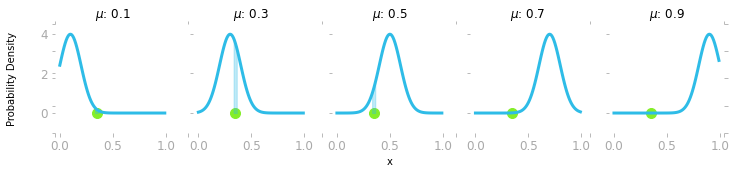

In [2]:

np.random.seed(1234)


def gaussian(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-(1 / (2 * sigma ** 2)) * (x - mu) ** 2)

x_axis = np.arange(0, 1, 0.01)
random_points = np.random.normal(0.3, 0.1, 10)

sigma = 0.1
#[...] Plot the first data sample and the gaussian distribution...

y_scatter = np.zeros(10)
f, axes = plt.subplots(1, 5, figsize=(12, 2), sharex=True, sharey=True)
all_densities = []
for i in range(5):
    mu = np.round(i/5 + 0.1, 2)
    axes[i].plot(x_axis, gaussian(x_axis, mu, sigma))
    axes[i].scatter(random_points[0], y_scatter[0], c="#84EE29")
    axes[i].set_ylim(-1, 4.5)
    axes[i].set_title(f"$\mu$: {mu}")
    axes[i].fill_between(x=[random_points[0] - 0.015, random_points[0] + 0.015],
                         y1=[0, 0],
                         y2=[gaussian(random_points[0] - 0.015, mu, sigma),
                             gaussian(random_points[0] + 0.015, mu, sigma)],
                        alpha=0.3,
                        color="#2EBCE7")
    all_densities.append(gaussian(random_points[0], mu, sigma))
    
# Add common labels
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()


<img src="images/blank.png" id="fig:ch05_output_various_mu" alt="Figure 61: Probability density function for different \mu and \sigma=0.1 in blue and a single data sample (x \approx 0.35) in green." />
Figure 61: Probability density function for different <span class="math inline"><em>μ</em></span> and <span class="math inline"><em>σ</em> = 0.1</span> in blue and a single data sample (<span class="math inline"><em>x</em> ≈ 0.35</span>) in green.

Figure [61](#fig:ch05_output_various_mu) show distributions using
various parameters $\mu$. With the single data sample (in green), what
value of $\mu$ corresponds to the most likely distribution?

If you look at the first distribution (left panel, $\mu=0.1$), you can
note that the probability of getting a value around our data sample is
quite low (density around 0.19). In comparison, the second plot
($\mu=0.3$) shows that there is a high probability density (around 3.57)
of getting a value corresponding to the data sample.

This means that, when there is a single data sample, the likelihood of
one distribution corresponds to the probability density of the data
sample for a specific set of parameters.

Let’s calculate the likelihood for various values of $\mu$ and plot what
you obtain:

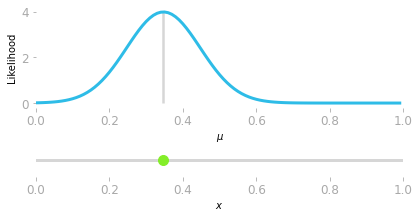

In [3]:

np.random.seed(1234)


# Calculate densities for various mu
all_densities = []
for mu in x_axis:
    all_densities.append(gaussian(random_points[0], mu, sigma))
# [...] Plot `all_densities` and `random_points`

f, axes = plt.subplots(2, 1, figsize=(6, 3),
                       gridspec_kw={'height_ratios': [3, 1]})
f.tight_layout()

axes[0].plot(x_axis, all_densities)
axes[0].vlines(random_points[0], ymin=0,
           ymax=gaussian(random_points[0], mu=random_points[0], sigma=sigma),
          color="#d6d6d6", zorder=0, linewidth=2.5)
axes[0].set_xlabel("$\mu$")
axes[0].set_ylabel("Likelihood")
axes[0].set_xlim(0, 1)

axes[1].scatter(random_points[0], 0, c="#84EE29")
axes[1].set_xlabel("$x$")
axes[1].set_xlim(0, 1)
axes[1].axhline(0, c="#d6d6d6", zorder=0)
axes[1].set_yticklabels([])
axes[1].set_yticks([])

plt.show()


<img src="images/blank.png" id="fig:ch05_output_likelihood_mu" alt="Figure 62: The likelihood function. The likelihood of obtaining our single data sample (in green) as a function of \mu. The more plausible value for \mu is around 0.35 (which corresponds to the value of the data sample)." />
Figure 62: The likelihood function. The likelihood of obtaining our single data sample (in green) as a function of <span class="math inline"><em>μ</em></span>. The more plausible value for <span class="math inline"><em>μ</em></span> is around 0.35 (which corresponds to the value of the data sample).

Figure [62](#fig:ch05_output_likelihood_mu) represents the likelihood
for each value of $\mu$. As you might expect, the distribution with a
mean corresponding to the value of the data sample (0.35) is the more
likely to generate the data sample.

In the next section, you’ll see how to calculate the likelihood with
multiple data samples.

#### More Data Samples

What should you do if you have more data samples?

Let’s consider an example in which the data samples are independently
drawn from the same distribution. The value of one data sample doesn’t
depend on the values of the other data samples: we say that the data
samples are *independent and identically distributed* (IID).

Independence implies that the probability to observe all data samples
corresponds to the joint probability of observing the data samples
separately. Remember from
Section 2.4.1 that you can
calculate the joint probability of two independent events by multiplying
their individual probabilities: $P(x, y)=P(x)P(y)$.

You can thus calculate the probability of observing all data samples by
multiplying the probabilities to observe $N$ individual samples. You can
write:

$$
\mathcal{L}_x(\mu, \sigma^2)= \prod_{n=1}^N \mathcal{N}(\evx_n ; \mu,\,\sigma^{2})
\qquad (5)$$

This is the likelihood function. The symbol $\prod$ (the Greek letter
“capital Pi”) is called the *product notation* and denotes a repeated
product. It is the equivalent of $\Sigma$ for product. As you saw in
Section 3.2, $\mathcal{N}$
refers to the Gaussian distribution, parameterized by $\mu$ and
$\sigma^2$.

You can understand equation Section 4.4.2.2 as follows:
for each data sample $x_n$ from the first ($x_1$) to the $N$th ($x_N$),
you calculate the density using a Gaussian distribution that have a mean
$\mu$ and a variance $\sigma^2$. You multiply each of these densities
together to get the likelihood for these values of $\mu$ and $\sigma^2$.
As you saw earlier, the likelihood is a function of the distribution
parameters: you give distribution parameters as input and it returns the
likelihood that the data samples are coming from a distribution with
these parameters.

You can use this formula to calculate the likelihood to observe the data
samples for specific distribution parameters (here, $\mu$ and $\sigma$).

Let’s calculate the likelihood using 10 data samples. As shown in the
equation, the likelihood of getting a specific distribution given that
you observed these data samples is calculated as the product of all
probability densities of $x$ for each value of $\mu$ (still with
$\sigma=0.1$). Let’s see what you obtain.

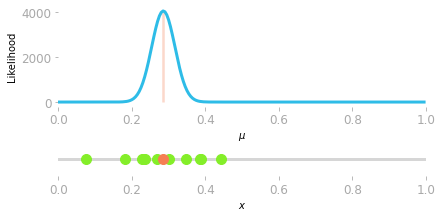

In [4]:

np.random.seed(1234)

n_points = 10

x_axis = np.arange(0, 1, 0.005)
random_points = np.random.normal(0.3, 0.1, n_points)

sigma = 0.1

# Calculate densities for various mu
all_densities = []
for mu in x_axis:
    density = 1
    for i in range(n_points):
        density *= gaussian(random_points[i], mu, sigma)
    all_densities.append(density)
# [...] Plot the likelihood function

f, axes = plt.subplots(2, 1, figsize=(6, 3),
                       gridspec_kw={'height_ratios': [3, 1]})
f.tight_layout()

# Likelihood function
axes[0].plot(x_axis, all_densities)

# Individual data samples with their lines
for point in range(n_points):
    axes[0].vlines(random_points[point], ymin=0,
               ymax=gaussian(random_points[point], mu=random_points[point], sigma=sigma),
              color="#d6d6d6", zorder=0, linewidth=2.5)
    axes[1].scatter(random_points[point], 0, c="#84EE29")

# Average of data samples
axes[0].vlines(np.mean(random_points[:n_points]),
           ymin=0,
           ymax=all_densities[np.int(np.mean(random_points[:n_points]) * x_axis.shape[0])],
          color="#F57F53", alpha=0.3, zorder=0, linewidth=2.5)

axes[1].scatter(np.mean(random_points[:n_points]), 0, c="#F57F53")

axes[0].set_xlabel("$\mu$")
axes[0].set_ylabel("Likelihood")
axes[0].set_xlim(0, 1)

axes[1].set_xlabel("$x$")
axes[1].set_xlim(0, 1)
axes[1].set_ylim(-0.5, 0.5)
axes[1].axhline(0, c="#d6d6d6", zorder=0)
axes[1].set_yticklabels([])
axes[1].set_yticks([])
plt.show()


<img src="images/blank.png" id="fig:ch05_output_likelihood_mu_ten_data_points" alt="Figure 63: Likelihood function (in blue) corresponding to 10 data samples (in green) as a function of \mu." />
Figure 63: Likelihood function (in blue) corresponding to 10 data samples (in green) as a function of <span class="math inline"><em>μ</em></span>.

You can see in Figure
[63](#fig:ch05_output_likelihood_mu_ten_data_points) that many data
samples are represented. It shows that the best value of $\mu$ changes
when you add data samples. Note that the maximum likelihood value
corresponds to the mean of the data samples.

### 4.2.3 Maximum Likelihood Estimation

*Maximum likelihood estimation* (MLE) is aimed at finding the parameters
of a distribution that fits the data well, which is the maximum value of
the likelihood function. For instance, it can be used to optimize a
model’s parameters in a supervised learning procedure where the targets
are considered as conditional probabilities given the data.

#### Negative Log-Likelihood

You saw in the previous section that the likelihood is calculated by
multiplying the probability densities of each independent data sample.
The issue is that, with a lot of data samples, we end up multiplying a
large number of small probabilities. This can lead to a loss of
numerical precision. (bishop, Christopher M. Pattern recognition and
machine learning. springer, 2006., p.26.)

Fortunately, there is a way to simplify this calculation. Logarithm
functions have the property to convert products into sums
($\log(xy) = \log(x) + \log(y)$). This is why it is easier to calculate
the logarithm of the likelihood. For instance, to calculate the
likelihood of two data samples, you can do:

$$
\mathcal{L}_{\vx}(\mu, \sigma^2) = \mathcal{N}(\evx_0 ; \mu,\,\sigma^{2}) \cdot \mathcal{N}(\evx_1 ; \mu,\,\sigma^{2})
$$

Where $\vx$ is a vector containing all the data samples and $\evx_0$ and
$\evx_1$ are individual data samples.

Using the logarithm, you can do:

$$
\text{log}(\mathcal{L}_{\vx}(\mu, \sigma^2)) = \text{log}(\mathcal{N}(\evx_0 ; \mu,\,\sigma^{2})) + \text{log}(\mathcal{N}(\evx_1 ; \mu,\,\sigma^{2}))
$$

For this reason, maximizing the log of the likelihood function is
easier.

Note that this is possible only because the log function is
*monotonically increasing*: that is, the value of $\vtheta$ maximizing
$\mathcal{L}_{\vx}(\vtheta)$ also maximizes
$\text{log}(\mathcal{L}_{\vx}(\vtheta))$.

In addition, we generally use the negative log likelihood, because
optimizers usually minimize functions. Minimizing the negative log
likelihood is equivalent to maximizing the log likelihood.

#### Derivative of the Log-Likelihood

One way to find the minimum value of the negative log likelihood
function is to differentiate it with respect to the parameters you’re
trying to optimize (as you saw in
Section 1.3).

With the maximum likelihood for the Gaussian distribution, you’re trying
to estimate the best values for $\mu$ and $\sigma^2$. The solution (if
you want details on the calculation of the derivative of the negative
log likelihood for the Gaussian distribution, you can read
http://jrmeyer.github.io/machinelearning/2017/08/18/mle.html) happens to
be the sample mean and the sample variance. (bishop, Christopher M.
Pattern recognition and machine learning. springer, 2006., p.27)

#### Maximum A Posteriori Estimation

In some situations, you have hypotheses about the distribution of the
parameters you’re optimizing. Leveraging the Bayesian approach, you can
use prior knowledge to modify the choice of the maximum point in the
likelihood function using the *maximum a posteriori estimation* (MAP).
The Latin term *a posteriori* refer to knowledge that use empirical
evidence. This contrasts with maximum likelihood, which is a frequentist
method.

In this context, the influence of the prior can be seen as
regularization (more details in Goodfellow, Ian, Yoshua Bengio, and
Aaron Courville. Deep learning. MIT press, 2016., p.139) (for more
details about regularization, you can refer to the hands-on project in
Section 5.5).

MAP uses a prior probability distribution of the parameters you’re
trying to optimize ($\vtheta$). You want to update the distribution of
$\vtheta$ using your data $\vx$. This is the posterior distribution and
Bayes’ Theorem can be used to calculate it. The prior distribution is
$p(\vtheta)$ and $p(\vx | \vtheta)$ is the likelihood. you have:

$$
p(\vtheta | \vx) = \frac{p(\vx | \vtheta) p(\vtheta)}{p(\vx)}
$$

Note that in the context of Bayes’ Theorem, $\vtheta$ and $\vx$ are both
random variables, thus it makes sense to refer to the likelihood with
$p(\vx | \vtheta)$. (more details in this thread:
https://stats.stackexchange.com/a/224418/42330)

Since the purpose of MAP is to find the best value of $\vtheta$
(associated with the maximum of the posterior distribution), you can
remove $p(\vx)$. The same value of $\vtheta$ maximizes
$\frac{p(\vx | \vtheta) p(\vtheta)}{p(\vx)}$ and
$p(\vx | \vtheta) p(\vtheta)$.

To write the proportional relationship between the two statements, you
use the $\propto$ symbol, which means “proportional to”. you can’t use
the equal sign anymore, since you removed $p(\vx)$:

$$
p(\vtheta | \vx) \propto p(\vx | \vtheta) p(\vtheta)
$$

The standard deviation of the prior distribution affects the weight
given to it: a large standard deviation means that you don’t have much
confidence into the prior and that it is given less weight.

4.3 Information Theory
----------------------

The field of *information theory* studies the quantification of
information in signals. In the context of machine learning, some of
these concepts are used to characterize or compare probability
distributions. The ability to quantify information is also used in the
decision tree algorithm, to select the variables associated with the
maximum information gain. The concepts of entropy and cross-entropy are
also important in machine learning because they lead to a widely used
loss function in classification tasks: the cross-entropy loss or log
loss.

### 4.3.1 Shannon Information

#### Intuition

The first step to understanding information theory is to consider the
concept of the quantity of information associated with a random
variable. In information theory, this quantity of information is denoted
as $I$ and is called the *Shannon information*, *information content*,
*self-information*, or *surprisal*. The main idea is that likely events
convey less information than unlikely events (which are thus more
*surprising*). For instance, if a friend from Los Angeles, California
tells you: “It is sunny today”, this is less informative than if she
tells you: “It is raining today”. For this reason, is can be helpful to
think of the Shannon information as the amount of surprise associated
with an outcome. You’ll also see in this section why it is also a
quantity of information, and why likely events are associated with less
information.

#### Units of Information

Common units to quantity information are the *nat* and the *bit*. These
quantities are based on logarithm functions. The word *nat*, short for
*natural unit of information* is based on the natural logarithm, while
the bit, short for “binary digit”, is based on base-two logarithms. The
bit is thus a rescaled version of the nat. The following sections will
mainly use the bit and base-two logarithms in formulas, but replacing it
with the natural logarithm would just change the unit from bits to nats.

Bits represent variables that can take two different states (0 or 1).
For instance, 1 bit is needed to encode the outcome of a coin flip. If
you flip two coins, you’ll need at least two bits to encode the result.
For instance, 00 for HH, 01 for HT, 10 for TH, and 11 for TT. You could
use other codes, such as 0 for HH, 100 for HT, 101 for TH, and 111 for
TT. However, this code uses a larger number of bits on average
(considering that the probability distribution of the four events is
uniform, as you’ll see)

Let’s take an example to see what a bit describes. Erica sends you a
message containing the result of three coin flips, encoding ‘heads’ as 0
and ‘tails’ as 1. There are 8 possible sequences, such as 001, 101, etc.
When you receive a message of one bit, it divides your uncertainty by a
factor of 2. For instance, if the first bit tells you that the first
roll was ‘heads’, the remaining possible sequences are 000, 001, 010,
and 011. There are only 4 possible sequences instead of 8. Similarly,
receiving a message of two bits will divide your uncertainty by a factor
of $2^2$; a message of three bits, by a factor of $2^3$, and so on.

Note that we talk about “useful information”, but it is possible that
the message is redundant and convey less information with the same
number of bits.

#### Example

Let’s say that we want to transmit the result of a sequence of eight
tosses. You’ll allocate one bit per toss. You thus need eight bits to
encode the sequence. The sequence might be for instance “00110110”,
corresponding to HHTTHTTH (four “heads” and four “tails”).

However, let’s say that the coin is biased: the chance to get “tails” is
only 1 over 8. You can find a better way to encode the sequence. One
option is to encode the index of the outcomes “tails”: it will take more
than one bit, but ‘tails’ occurs only for a small proportion of the
trials. With this strategy, you allocate more bits to rare outcomes.

This example illustrates that more predictable information can be
compressed: a biased coin sequence can be encoded with a smaller amount
of information than a fair coin. This means that Shannon information
depends on the probability of the event.

#### Mathematical Description

Shannon information encodes this idea and converts the probability that
an event will occur into the associated quantity of information. Its
characteristics are that, as you saw, likely events are less informative
than unlikely events and also that information from different events is
additive (if the events are independent).

Mathematically, the function $I(x)$ is the information of the event
$\rx=x$ that takes the outcome as input and returns the quantity of
information. It is a monotonically decreasing function of the
probability (that is, a function that never increases when the
probability increases). Shannon information is described as:

$$
I(x)=-\log_2 P(x)
\qquad (6)$$

The result is a lower bound on the number of bits, that is, the minimum
amount of bits needed to encode a sequence with an optimal encoding.

The logarithm of a product is equal to the sum of the elements:
$\log_2(ab)=\log_2(a)+\log_2(b)$. This property is useful to encode the
additive property of the Shannon information. The probability of
occurrence of two events is their individual probabilities multiplied
together (because they are independent, as you saw in
Section 2.4.1.2):

$$
I(x, y)=-\log_2 P(x, y)=-(\log_2 P(x) + \log_2 P(y))
$$

This means that the information corresponding to the probability of
occurrence of two events $P(x, y)$ equals the information corresponding
to $P(x)$ added to the information corresponding to $P(y)$. The
information of independent events adds together.

Let’s plot this function for a range of probability between 0 and 1 to
see the shape of the curve:

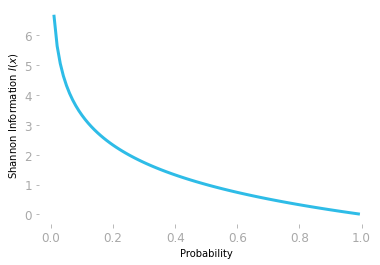

In [5]:
plt.plot(np.arange(0.01, 1, 0.01), -np.log2(np.arange(0.01, 1, 0.01)))

plt.xlabel("Probability")
plt.ylabel("Shannon Information $I(x)$")
plt.show()


<img src="images/blank.png" id="fig:ch05_output_negative_log" alt="Figure 64: The quantity of information is given by the negative logarithm of the probability." />
Figure 64: The quantity of information is given by the negative logarithm of the probability.

As you can see in Figure [64](#fig:ch05_output_negative_log), the
negative logarithm function encodes the idea that a very unlikely event
(probability around 0) is associated with a large quantity of
information and a likely event (probability around 1) is associated with
a quantity of information around 0.

Since you used a base-two logarithm `np.log2()`, the information $I(x)$
is measured in *bits*.

### 4.3.2 Entropy

You saw that Shannon information gives the amount of information
associated with a single probability. You can also calculate the amount
of information of a discrete distribution with the *Shannon entropy*,
also called *information entropy*, or simply *entropy*.

#### Example

Consider for instance a biased coin, where you have a probability of 0.8
of getting ‘heads’.

1.  Here is your distribution: you have a probability of 0.8 of getting
    ‘heads’ and a probability of $1 - 0.8 = 0.2$ of getting ‘tails’.
2.  These probabilities are respectively associated with a Shannon
    information of:

$$
-\log_2 0.8 \approx 0.32
$$

and

$$
-\log_2 0.2 = 2.32
$$

1.  Landing ‘heads’ is associated with an information around 0.32 and
    landing ‘tails’ to 2.32. However, you don’t have the same number of
    ‘heads’ and ‘tails’ in average, so you must weight the Shannon
    information of each probability with the probability itself. For
    instance, if you want to transmit a message with the results of,
    say, 100 trials, you’ll need around 20 times the amount of
    information corresponding to ‘tails’ and 80 times the amount of
    information corresponding to ‘heads’. You get:

$$
0.8 \cdot (-\log_2 0.8) \approx 0.26
$$

and

$$
0.2 \cdot (-\log_2 0.2) = 0.46
$$

1.  The sum of these expressions gives you:

$$
0.8 \cdot (-\log_2 0.8) + 0.2 \cdot (-\log_2 0.2) = 0.26 + 0.46 = 0.72
$$

The average number of bits required to describe a series of events from
this distribution is 0.72 bits.

To summarize, you can consider the entropy as a summary of the
information associated with the probabilities of the discrete
distribution:

1.  You calculate the Shannon information of each probability of your
    distribution.
2.  You weight the Shannon information with the corresponding
    probability.
3.  You sum the weighted results.

#### Mathematical Formulation

The entropy is the expectation of the information with respect to the
probability distribution. Remember from
Section 2.6
that the expectation is the mean value you’ll get if you draw a large
number of samples from the distribution:

$$
\expval[\rx\rbrack = \sum_{i=1}^n P(x_i) x_i
\qquad (7)$$

with the random variable $\rx$ having $n$ possible outcomes, $x_i$ being
the $i$th possible outcome corresponding to a probability of $P(x_i)$.
The expected value of the information of a distribution corresponds to
the average of the information you’ll get.

Following the formula of the expectation (equation [7](#eq:expectation))
and the Shannon information (equation [6](#eq:information)), the entropy
of the random variable $\rx$ is defined as:

$$
H(\rx) = \expval[I(x)\rbrack = -\sum_x P(x)\log_2 P(x)
$$

The entropy gives you the average quantity of information that you need
to encode the states of the random variable $\rx$.

Note that the input of the function $H(\rx)$ is the random variable
$\rx$ while $I(x)$ denotes the Shannon information of the event $\rx=x$.
You can also refer to the entropy of the random variable $\rx$ which is
distributed with respect to $P(x)$ as $H(P)$.

#### Illustration

Let’s take an example: as illustrated in Figure [65](#fig:ch05_entropy)
in the bottom panel, you have a discrete distribution with four possible
outcomes, associated with probabilities 0.4, 0.4, 0.1, and 0.1,
respectively. As you saw previously, the information is obtained by log
transforming the probabilities (top panel). This is the last part of the
entropy formula: $\log_2 P(x)$.

<img src="images/ch05_entropy.png" id="fig:ch05_entropy" width="200" alt="Figure 65: Illustration of the entropy as the weighted sum of the Shannon information." />
Figure 65: Illustration of the entropy as the weighted sum of the Shannon information.

Each of these transformed probabilities is weighted by the corresponding
raw probability. If an outcome occurs frequently, it will give more
weight into the entropy of the distribution. This means that a low
probability (like 0.1 in Figure [65](#fig:ch05_entropy)) gives a large
amount of information (3.32 bits) but has less influence on the final
result. A larger probability (like 0.4 in Figure
[65](#fig:ch05_entropy)) is associated with less information (1.32 bits
as shown in Figure [65](#fig:ch05_entropy)) but has more weight.

#### Binary Entropy Function

In the example of a biased coin, you calculated the entropy of a
Bernoulli process (more details about the Bernoulli distribution in
Section 3.3). In this
special case, the entropy is called the *binary entropy function*.

To characterize the binary entropy function, you’ll calculate the
entropy of a biased coin described by various probability distributions
(from heavily biased in favor of “tails” to heavily biased in favor of
“heads”).

Let’s start by creating a function to calculate the entropy of a
distribution that takes an array with the probabilities as input and
returns the corresponding entropy:

In [6]:
def entropy(P):
    return - np.sum(P * np.log2(P))

You can also use `entropy()` from `scipy.stats`, where you can specify
the base of the logarithm used to calculate the entropy. Here, I have
used the base-two logarithm.

Let’s take the example of a fair coin, with a probability of 0.5 of
landing ‘heads’. The distribution is thus 0.5 and $1-0.5 = 0.5$. Let’s
use the function we just defined to calculate the corresponding entropy
is:

In [7]:
p = 0.5
entropy(np.array([p, 1 - p]))

1.0

The function calculates the sum of `P * np.log2(P)` over each element of
the array that you use as input. Using an array as input As you saw in
the previous section, you can expect a lower entropy for a biased coin.
Let’s plot the entropy for various coin biases, from a coin landing only
as ‘tails’ to a coin landing only as ‘heads’:

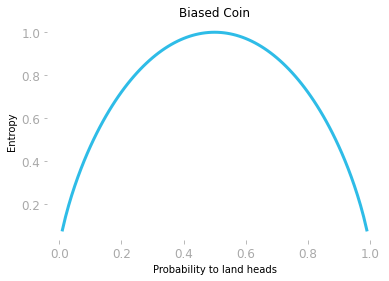

In [8]:
x_axis = np.arange(0.01, 1, 0.01)
entropy_all = []
for p in x_axis:
    entropy_all.append(entropy([p, 1 - p]))

# [...] plots the entropy

plt.plot(x_axis, entropy_all)
plt.title("Biased Coin")
plt.xlabel("Probability to land heads")
plt.ylabel("Entropy")
plt.show()


<img src="images/blank.png" id="fig:ch05_output_entropy_bernoulli" alt="Figure 66: Entropy as a function of the probability to land “heads”." />
Figure 66: Entropy as a function of the probability to land “heads”.

Figure [66](#fig:ch05_output_entropy_bernoulli) shows that the entropy
increases until you reach the more uncertain condition: that is, when
the probability of landing ‘heads’ equals the probability of landing
‘tails’.

#### Differential Entropy

The entropy of a continuous distribution is called *differential
entropy*. It is an extension of the entropy for discrete distribution,
but it doesn’t satisfy the same requirements. The issue is that values
have probability tending to zero with continuous distributions, and
encoding this would require a number of bits tending to infinity.

It is defined as:

$$
H(P) = -\int p(x)\log_2 p(x)\; dx
$$

Differential entropy can be negative. The reason is that, as you saw in
Section 2.3.2,
continuous distributions are not probabilities but probability
densities, meaning that they don’t satisfy the requirements of
probabilities. For instance, they are not constrained to be lower than
1. This has the consequence that $p(x)$ can take positive values larger
than 1 and $\log_2 p(x)$ can take positive values (leading to negative
values because of the negative sign). (you can find more details on
differential entropy in Bishop, Christopher M. Pattern recognition and
machine learning. springer, 2006., p.53.)

### 4.3.3 Cross-Entropy

The concept of entropy can be used to compare two probability
distributions: this is called the *cross-entropy* between two
distributions, which measures how much they differ.

The idea is to calculate the information associated with the
probabilities of a distribution $Q(x)$, but instead of weighting
according to $Q(x)$ as with the entropy, you weight according to the
other distribution $P(x)$. Note that you compare two distributions
concerning the same random variable $\rx$.

You can also consider cross-entropy as the expected quantity of
information of events drawn from $P(x)$ when you use $Q(x)$ to encode
them.

This is mathematically expressed as:

$$
H(P, Q) = -\sum_x P(x)\log_2 Q(x)
$$

Let’s see how it works.

<img src="images/ch05_cross_entropy.png" id="fig:ch05_cross_entropy" width="400" alt="Figure 67: Illustration of the cross-entropy as the Shannon information of Q(x) weighted according to the distribution of P(x)." />
Figure 67: Illustration of the cross-entropy as the Shannon information of <span class="math inline"><em>Q</em>(<em>x</em>)</span> weighted according to the distribution of <span class="math inline"><em>P</em>(<em>x</em>)</span>.

Figure [67](#fig:ch05_cross_entropy) shows two different situations to
illustrate the cross-entropy. On the left, you have two identical
distributions $P(x)$ (in blue) and $Q(x)$ (in red). Their cross-entropy
is equal to the entropy because the information of $Q(x)$ is weighted
according to the distribution of $P(x)$, which is similar to $Q(x)$.

However, in the right panel, $P(x)$ and $Q(x)$ are different. This
results in a larger cross-entropy, because probabilities associated with
a large quantity of information have a small weight, while probabilities
associated with a small quantity of information have large weights.

The cross-entropy can’t be smaller than the entropy. Still in the right
panel, you can see that, when the probability $Q(x)$ is larger than
$P(x)$ (and thus associated with a lower amount of information), it is
counterbalanced by the low weights (resulting in low weights and low
information). These low weights will be compensated with larger weights
in other probabilities from the distribution (resulting in large weights
and large information).

Note also that both distributions $P(x)$ and $Q(x)$ must have the same
*support* (that is the same set of values that the random variable can
take associated with positive probabilities).

To summarize, the cross-entropy is minimum when the distributions are
identical. As you’ll see in
Section 4.3.4, this
property makes the cross-entropy a useful metric. Note also that the
result is different according to the distribution you choose as a
reference: $H(P, Q) \neq H(Q, P)$.

#### Cross-Entropy as a Loss Function

In machine learning, cross-entropy is used as a loss function called the
*cross-entropy loss* (also called the *log loss*, or the *logistic
loss*, because it is used in logistic regression).

<figure>
<img src="images/ch05_cross_entropy_loss.png" id="fig:ch05_cross_entropy_loss" width="500" alt="Figure 68: Cross-entropy can be used to compare the true distribution (probability of 1 for the correct class and 0 otherwise) and the distribution estimated by the model." /><figcaption aria-hidden="true">Figure 68: Cross-entropy can be used to compare the true distribution (probability of 1 for the correct class and 0 otherwise) and the distribution estimated by the model.</figcaption>
</figure>

Say you want to build a model that classifies three different bird
species from audio samples. As illustrated in Figure
[68](#fig:ch05_cross_entropy_loss), the audio samples are converted in
features (here spectrograms) and the possible classes (the three
different birds) are *one-hot encoded*, that is, encoded as 1 for the
correct class and 0 otherwise. Furthermore, the machine learning model
outputs probabilities for each class.

To learn how to classify the birds, the model needs to compare the
estimated distribution $Q(x)$ (given by the model) and the true
distribution $P(x)$. The cross-entropy loss is computed as the
cross-entropy between $P(x)$ and $Q(x)$.

Figure [68](#fig:ch05_cross_entropy_loss) shows that the true class
corresponding to the sample you consider in this example is “European
Green Woodpecker”. The model outputs a probability distribution and
you’ll compute the cross-entropy loss associated with this estimation.
Figure [69](#fig:ch05_comparison_distributions) shows both
distributions.

<figure>
<img src="images/ch05_comparison_distributions.png" id="fig:ch05_comparison_distributions" width="250" alt="Figure 69: Comparison of the true distribution P(x) and the estimated distribution Q(x)." /><figcaption aria-hidden="true">Figure 69: Comparison of the true distribution <span class="math inline"><em>P</em>(<em>x</em>)</span> and the estimated distribution <span class="math inline"><em>Q</em>(<em>x</em>)</span>.</figcaption>
</figure>

Let’s manually calculate the cross-entropy between these two
distributions:

$$
\begin{aligned}
H(P, Q) &= -\sum_x P(x)\log Q(x) \\\\
&= -(1.0 \log 0.7 + 0.0 \log 0.2 + 0.0 \log 0.1) \\\\
&= -\log 0.7
\end{aligned}
$$

The natural logarithm is used in the cross-entropy loss instead of the
base-two logarithm, but the principle is the same. In addition, note the
use of $H(P, Q)$ instead of $H(Q, P)$ because the reference is the
distribution $P$.

Since you one-hot encoded the classes (1 for the true class and 0
otherwise), the cross-entropy is simply the negative logarithm of the
estimated probability for the true class.

#### Binary Classification: Log Loss

In machine learning, the cross-entropy is widely used as a loss for
binary classification: the log loss.

Since the classification is binary, the only possible outcomes are $y$
(the true label corresponds to the first class) and $1-y$ (the true
label corresponds to the second class). Similarly, you have the
estimated probability of the first class $\hat{y}$ and the estimated
probability of the second class $1 - \hat{y}$.

From the formula of the cross-entropy, $\sum_x$ corresponds here to the
sum over the two possible outcomes ($y$ and $1-y$). You have:

$$
\begin{aligned}
H(P, Q) &= -\sum_x P(x)\log Q(x) \\\\
&= - (y \log (\hat{y}) + (1-y) \log (1 - \hat{y})
\end{aligned}
$$

which is the formula of the log loss.

### 4.3.4 Kullback-Leibler Divergence (KL Divergence)

You saw that the cross-entropy is a value that depends on the similarity
of two distributions, with the smaller cross-entropy value corresponding
to identical distributions. You can use this property to calculate the
*divergence* between two distributions: you compare their cross-entropy
with the situation where the distributions are identical. This
divergence is called the *Kullback-Leibler divergence* (or simply the
*KL divergence*), or the *relative entropy*.

Intuitively, the KL divergence is the supplemental amount of information
associated with the encoding of the distribution $Q(x)$ compared to the
true distribution $P(x)$. It tells you how different the two
distributions are.

Mathematically, the KL divergence between two distributions $P(x)$ and
$Q(x)$, denoted as $D_{\text{KL}}(P||Q)$, is expressed as the difference
between the cross-entropy of $P(x)$ and $Q(x)$ and the entropy of
$P(x)$:

$$
D_{KL}(P || Q) = H(P, Q) - H(P) \geq 0
$$

Replacing with the expressions of the cross-entropy and the entropy, you
get:

$$
\begin{aligned}
D_{KL}(P || Q) &= H(P, Q) - H(P)\\\\
&= -\sum_x P(x)\log_2 Q(x) - (-\sum_x P(x)\log_2 P(x)) \\\\
&= \sum_x P(x)\log_2 P(x) - \sum_x P(x)\log_2 Q(x)
\end{aligned}
$$

The KL divergence is always non-negative. Since the entropy $H(P)$ is
identical to the cross-entropy $H(P, P)$, and because the smallest
cross-entropy is between identical distributions ($H(P, P)$), $H(P, Q)$
is necessarily larger than $H(P)$. In addition, the KL divergence is
equal to zero when the two distributions are identical.

However, the cross-entropy is not symmetrical. Comparing a distribution
$P(x)$ to a distribution $Q(x)$ can be different than comparing a
distribution $Q(x)$ to $P(x)$ – which implies that you can’t consider
the KL divergence to be a distance.

4.4 Hands-On Project: Bayesian Inference
----------------------------------------

*Statistical inference* is the process of finding the probability
distribution of the population from which the data samples were drawn.
This means that you want to know about the population from the data
samples. *Bayesian inference* is statistical inference using Bayes’
Theorem.

### 4.4.1 Bayesian Inference

As you saw in
Section 4.2.3, you
can use Maximum Likelihood Estimation (MLE) or Maximum A Posteriori
estimation (MAP) to estimate the parameters of a distribution. With
Bayesian inference, you estimates these parameters using Bayes’ Theorem.
The parameters are described through a distribution instead of a *point
estimate* (the single maximum value) with MLE and MAP. (you can also
calculate a standard error in addition to the point estimate with MLE
and MAP, giving you a distribution as well.) . The posterior
distribution is useful in describing the uncertainty associated with the
estimation.

As with MAP, a prior distribution is used to change the distribution of
the estimated parameters with elements from outside of the data. You
want to calculate the posterior probability from the likelihood and the
prior distribution. The posterior is obtained using Bayes’ Theorem (see
Section 4.1.4):

$$
P(\vtheta | \vx) = \frac{P(\vx | \vtheta) P(\vtheta)}{P(\vx)}
$$

with $\vtheta$ the vector of parameters, $\vx$ the data samples,
$P(\vtheta | \vx)$ being the posterior distribution, $P(\vx | \vtheta)$
the likelihood, $P(\vtheta)$ the prior distribution, and $P(\vx)$ the
marginal distribution. While the posterior can be calculated
analytically, this is not always possible. (when it is not, it still can
be approximated with a method called Markov Chain Monte-Carlo, or MCMC.
For more details, see for instance: Ravenzwaaij, Don, Pete Cassey, and
Scott D. Brown. “A simple introduction to Markov Chain Monte–Carlo
sampling.” Psychonomic bulletin & review 25.1 (2018): 143-154. It gives
a nice introduction of MCMC)

### 4.4.2 Project

Let’s take a practical example of Bayesian inference and visualize the
effect of the prior distribution. (this example is a practical
illustration of Bayesian inference, inspired by the theoretical section
of Bishop, Christopher M. Pattern recognition and machine learning.
Springer, 2006., p.97. You can refer to it for further details.) You’ll
generate some data samples from a known normal distribution. You’ll
estimate the parameters of this distribution (the mean $\mu$ and the
standard deviation $\sigma$, since it is a normal distribution) through
Bayesian inference.

To simplify the example, let’s assume that you already know that the
true standard deviation $\sigma_{\text{true}}$ is equal to 0.1. So the
goal here is to estimate only the true mean.

Let’s start by simulating some data:

In [9]:

np.random.seed(123)

n_obs = 10
sigma_true = 0.1
mu_true = 0.2

x_data = np.random.normal(mu_true, sigma_true, n_obs)


#### Prior

Now, you can choose a prior distribution for $\mu$ that encodes your
best guess and your uncertainty about its value.

$$
p(\mu) = \mathcal{N}(\mu; \mu_{\text{prior}}, \sigma_{\text{prior}}^2)
$$

It is important to understand that this prior distribution is a function
of $\mu$. You give a value of the parameter you want to test with
Bayesian inference and it returns a probability density. The value
$\mu_{\text{prior}}$ and $\sigma^2_{\text{prior}}$ are the parameters of
the prior distribution, which represents your initial beliefs.

Let’s choose a prior distribution with a mean 0.8 and standard deviation
0.1. You can try with other parameters, but this one is not too close to
the true distribution, which is nice to visualize the effect on the
posterior distribution.

In [10]:
mu_prior = 0.8
sigma_prior = 0.1

Now, you can create the prior using the Gaussian function as defined
above:

In [11]:
def gaussian(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) *\
        np.exp(-(1 / (2 * sigma ** 2)) * (x - mu) ** 2)


x_axis = np.arange(0, 1.2, 0.01)
prior_y = gaussian(x_axis, mu_prior, sigma_prior)

Let’s plot the prior:

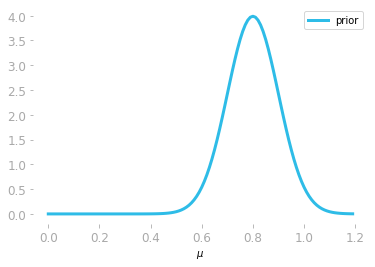

In [12]:
plt.plot(x_axis, prior_y, label='prior')
# [...] Add legend and label

plt.legend()
plt.xlabel(r"$\mu$")
plt.show()


<img src="images/blank.png" id="fig:ch05_output_prior_distribution" alt="Figure 70: The prior distribution is a Gaussian distribution with mean 0.8 and standard deviation 0.1." />
Figure 70: The prior distribution is a Gaussian distribution with mean 0.8 and standard deviation 0.1.

#### Likelihood

The next step is to update the prior using the likelihood to calculate
the posterior distribution. As you saw in
Section 4.2.2.2, the
likelihood is defined as:

$$
\begin{aligned}
p(\vx ; \mu) &= \prod_{n=1}^N \mathcal{N}(\evx_n ; \mu, \sigma^2_{\text{true}}) \\\\
&= \prod_{n=1}^N \frac{1}{\sqrt{2\pi \sigma_{\text{true}}^2}}e^{-\frac{1}{2\sigma_{\text{true}}^2}(\evx_n - \mu)^2}
\end{aligned}
$$

You can note that the likelihood is as a function of $\mu$ only and not
$\sigma_{\text{true}}^2$ because in this example, we assume that we know
$\sigma_{\text{true}}^2$.

Let’s calculate this product.

Since $\sqrt{x}=x^{1/2}$, you have:

$$
\frac{1}{\sqrt{2\pi \sigma_{\text{true}}^2}} = \frac{1}{\left(2\pi \sigma_{\text{true}}^2 \right)^{\frac{1}{2}}}
$$

and thus:

$$
\prod_{n=1}^N \frac{1}{\sqrt{2\pi \sigma_{\text{true}}^2}} = \frac{1}{\left(2\pi \sigma_{\text{true}}^2 \right)^{\frac{N}{2}}}
$$

In addition, from the laws of exponents, $e^a \cdot e^b=e^{a+b}$, so:

$$
\begin{aligned}
\prod_{n=1}^N e^{-\frac{1}{2\sigma_{\text{true}}^2}(\evx_n - \mu)^2} &= e^{\sum_{n=1}^{N} -\frac{1}{2\sigma_{\text{true}}^2}(\evx_n - \mu)^2} \\\\
&= e^{-\frac{1}{2\sigma_{\text{true}}^2} \sum_{n=1}^{N} (\evx_n - \mu)^2}
\end{aligned}
$$

So you have the likelihood function:

$$
p(\vx ; \mu) = \frac{1}{\left(2\pi \sigma_{\text{true}}^2 \right)^{\frac{N}{2}}} e^{-\frac{1}{2\sigma_{\text{true}}^2} \sum_{n=1}^{N} (\evx_n - \mu)^2}
$$

This is the likelihood of observing the $N$ data samples $\vx$ as a
function of $\mu$. Like the prior distribution, the likelihood is a
function of $\mu$.

Let’s implement this function. It takes the data $\vx$ and $\mu$ as
inputs and returns the corresponding likelihood. Let’s write this
function in a way that allows you to pass an array of $\mu$ values. It
will return the likelihood for each of those values.

In [13]:
def likelihood(x, mu):
    sigma_true = 0.1
    N = x.shape[0]
    n_mu = mu.shape[0]
    likelihood = np.zeros(n_mu)
    for i in range(n_mu):
        likelihood[i] = (1 / ((2 * np.pi * sigma_true ** 2) ** (N / 2))) *\
            np.exp((-1 / (2 * sigma_true ** 2)) * np.sum((x - mu[i]) ** 2))
    return likelihood
    

You can try the likelihood function with a single value of $\mu$:

In [14]:
likelihood(x=x_data, mu=np.array([0.2]))

array([340.70708444])

This result means that the likelihood that the distribution of the data
is a Gaussian function with a mean of 0.2 and a standard deviation of
0.1 ($\sigma^2_{\text{true}}$) is around 340.7.

You can use this function to calculate the likelihood for a range of
values, and plot the likelihood function:

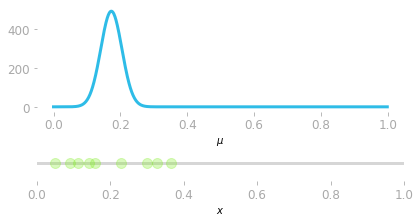

In [15]:
mu_axis = np.arange(0, 1, 0.001)
likelihood_y = likelihood(x=x_data, mu=mu_axis)

f, axes = plt.subplots(2, 1, figsize=(6, 3),
                       gridspec_kw={'height_ratios': [3, 1]})

axes[0].plot(mu_axis, likelihood_y)
axes[1].scatter(x_data, np.repeat(0, x_data.shape[0]), c="#84EE29", alpha=0.3)
# [...] Add axes, label, etc.

f.tight_layout()
axes[0].set_xlabel("$\mu$")

axes[1].set_xlim(0, 1)
axes[1].set_xlabel("$x$")
axes[1].axhline(0, c="#d6d6d6", zorder=0)
axes[1].set_yticklabels([])
axes[1].set_yticks([])
plt.show()


<img src="images/blank.png" id="fig:ch05_output_likelihood_function_and_data_points" alt="Figure 71: The likelihood function and the corresponding data samples." />
Figure 71: The likelihood function and the corresponding data samples.

You can see in Figure
[71](#fig:ch05_output_likelihood_function_and_data_points) the
likelihood function obtained for a range of potential values of $\mu$
(`mu_axis`). The axes on the plot should remind you that the likelihood
curve is a function of $\mu$. The data samples are also represented,
showing that the peak of the likelihood function corresponds to the
sample mean.

#### Posterior

When the prior and the likelihood are Gaussian distributions, the
posterior is also a Gaussian distribution. It is thus possible to
mathematically express the posterior as a Gaussian:

$$
p(\mu | \vx) = \mathcal{N}(\mu ; \mu_{\text{post}}, \sigma^2_{\text{post}})
$$

This means that the posterior distribution $p(\mu | \vx)$ is still a
function of $\mu$ and parametrized by the mean ($\mu_{\text{post}}$) and
the variance ($\sigma^2_{\text{post}}$).

The posterior can be analytically calculated. We’ll take for granted
that the values of the parameters are calculated as follows (you can
find more details in Bishop, Christopher M. Pattern recognition and
machine learning. springer, 2006., p. 98 and ex 2.38.) :

$$
\begin{aligned}
\mu_{\text{post}} &= \frac{\sigma^2_{\text{true}}}{N \sigma_{\text{prior}}^2 + \sigma^2_{\text{true}}}\mu_{\text{prior}} + \frac{N\sigma_{\text{prior}}^2}{N \sigma_{\text{prior}}^2 + \sigma^2_{\text{true}}}\mu_{\text{ML}} \\\\
\frac{1}{\sigma^2_{\text{post}}} &= \frac{1}{\sigma_{\text{prior}}^2} + \frac{N}{\sigma^2_{\text{true}}}
\end{aligned}
$$

Here, $N$ is the number of observations (`N = x.shape[0]` in the
posterior function implemented below) and $\mu_{\text{ML}}$ the maximum
likelihood solution (corresponding to the value of $\mu$ associated with
the largest likelihood). As you saw in
Section 4.2.3, the
maximum likelihood solution is equal to the sample mean (the mean of the
data samples: `mu_ML = x.mean()` in the posterior function below).

Let’s see how to interpret the formula of the mean ($\mu_{\text{post}}$)
and the standard deviation ($\sigma^2_{\text{post}}$) of the posterior.

If you look at the mean of the posterior, $\mu_{\text{post}}$, has two
components: the mean of the prior ($\mu_{\text{prior}}$) and the maximum
likelihood solution ($\mu_{\text{ML}}$). These two components are
weighted by factors (`factor_mu_prior` and `factor_mu_ML` in the code
below) that make the result close to the prior or close to the
likelihood (and thus, the data). If the number of observations $N$ is
large, the weight of the maximum likelihood solution increases (because
$N$ is in the nominator for the weight of $\mu_{\text{ML}}$), and thus,
the relative prior weight decreases: the data has more influence. If $N$
tends to 0, the maximum likelihood solution tends to zero, and thus, the
estimated mean corresponds to the prior mean.

Concerning the estimated variance, $\frac{1}{\sigma^2_{\text{post}}}$
corresponds to the precision (the inverse of the variance). You can see
that the precision increases when $N$ increases, which means that the
width of the Gaussian distribution of the posterior will be smaller,
leading a smaller uncertainty in the result.

Let’s implement a function that calculates the posterior using these
equations. This function must take the data and the parameters of the
prior distribution $\mu_{\text{prior}}$ and $\sigma_{\text{prior}}$ as
parameters. It will return the parameters of the posterior distribution
(the mean and the standard deviation).

In [16]:
def posterior(x, mu_prior, sigma_prior):
    sigma_true = 0.1
    N = x.shape[0]
    mu_ML = x.mean()
    
    factor_mu_prior = sigma ** 2 / (N * sigma_prior ** 2 + sigma ** 2)
    factor_mu_ML = (N * sigma_prior ** 2) / (N * sigma_prior ** 2 + sigma ** 2)
    mu_N = factor_mu_prior * mu_prior + factor_mu_ML * mu_ML
    
    sigma_N = np.sqrt(1 / ((1 / (sigma_prior ** 2)) + (N / (sigma ** 2))))
    
    return mu_N, sigma_N
    

You have all the building blocks to look at the effect of the data and
the prior on the estimated distribution. You’ll calculate the likelihood
from the data, use the prior to calculate the posterior, and then plot
the prior and posterior distributions with the true mean, using
different number of data samples.

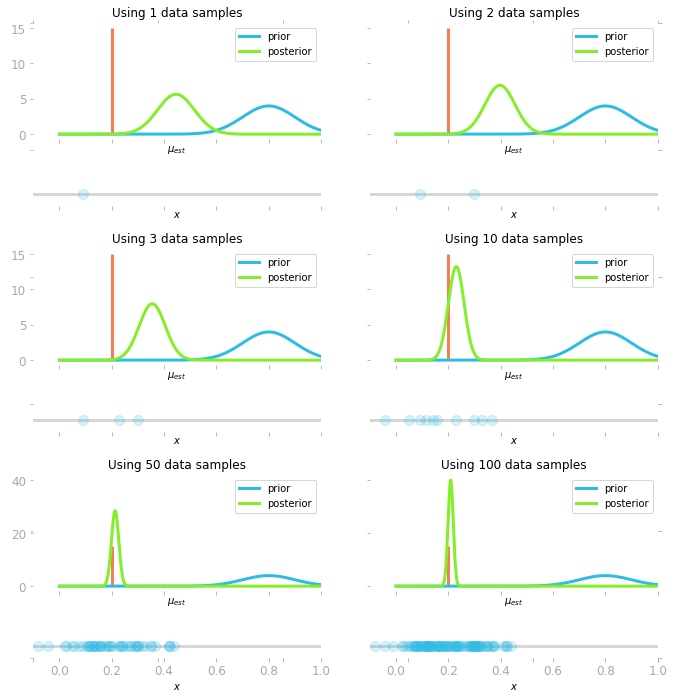

In [17]:
mu_true = 0.2
sigma_true = 0.1

mu_prior = 0.8
sigma_prior = 0.1

x_axis = np.arange(0, 1, 0.001)
prior_y = gaussian(x_axis, mu_prior, sigma_prior)

# [...] Prepare axes etc.

np.random.seed(123)

f, axes = plt.subplots(6, 2, figsize=(10, 10), sharex=True, sharey="row",
                      gridspec_kw={'height_ratios': [5, 1, 5, 1, 5, 1]})

indexes = [0, 2, 1, 3, 4, 6, 5, 7, 8, 10, 9, 11]
axes = axes.flatten()[indexes]
f.tight_layout(pad=3.0)

all_obs = [1, 2, 3, 10, 50, 100]
x_data = np.random.normal(mu_true, sigma_true, all_obs[-1])

count = 0
for n_obs, ax in zip(np.repeat(all_obs, 2), axes):
    if count % 2 == 1:
        ax.scatter(x_data[:n_obs], np.repeat(0, n_obs), zorder=10, alpha=0.2)
        # [...] Add axes, labels, etc.
        
        ax.set_xlim(-0.1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel("$x$")
        ax.axhline(0, c="#d6d6d6", zorder=0)
        ax.set_yticklabels([])
        ax.set_yticks([])
        
    else:
        likelihood_y = likelihood(x=x_data[:n_obs], mu=mu_axis)
        mu_posterior, sigma_posterior = posterior(x_data[:n_obs], mu_prior, sigma_prior)
        posterior_y = gaussian(x_axis, mu_posterior, sigma_posterior)

        ax.plot(x_axis, prior_y, label='prior')
        ax.plot(x_axis, posterior_y, label='posterior')

        ax.vlines(x=mu_true, ymin=0, ymax=15, color="#F57F53")
        # [...] Add axes, labels, etc.
        
        axes[count].legend(loc="upper right")

        ax.set_xlim(-0.1, 1)
        ax.set_title(f"Using {n_obs} data samples")
        ax.set_xlabel("$\mu_{est}$")
        
    
    count += 1
    
# [...] Add common labels, etc.

f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.show()


<img src="images/blank.png" id="fig:ch05_output_prior_posterior_data_effect" alt="Figure 72: Prior (in blue) and posterior distributions (in green) using different number of data samples. The mean of the data samples is represented in red. The data samples are also represented (note that their values are not function of \mu, hence the separate axis)." />
Figure 72: Prior (in blue) and posterior distributions (in green) using different number of data samples. The mean of the data samples is represented in red. The data samples are also represented (note that their values are not function of <span class="math inline"><em>μ</em></span>, hence the separate axis).

Figure [72](#fig:ch05_output_prior_posterior_data_effect) shows the
effect of increasing the number of data samples on Bayesian inference.
You can see that the prior is given less weight when you add data (the
green curve move off the blue one).

Try to decrease the standard deviation of the prior and you’ll see that
the prior will be given more weight. It’s like saying that you’re more
less uncertain about your prior.

Using a prior can be used to force the fit toward values that are not
expressed in the data, and in this sense, it acts exactly as a
regularization term (you’ll see more details on regularization in
Section 5.5).

